本代码的目的是比较predict出来的图片和原图片的指标是否有进步

1.导入库

In [1]:
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import numpy as np

import os, sys
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr

2.存储路径

In [2]:
pred_path = 'D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x_predict'
rec_path = 'D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x'
pre_path = 'D:/Document/DataSet/hzh_200_epoch_training_result/val_images_y'


# SSIM

1.先计算重建图像与原图像的平均SSIM

In [3]:
rec_dir = os.listdir(rec_path)
rec_ssim_sum = 0
img_num = len(rec_dir)
rec_ssim_list = []
print(img_num)
for file in rec_dir:
    rec_img = np.array(Image.open(os.path.join(rec_path,file)))
    pre_img = np.array(Image.open(os.path.join(pre_path,file)))
    img_ssim = ssim(rec_img, pre_img, multichannel=True)
    rec_ssim_sum = rec_ssim_sum + img_ssim
    rec_ssim_list.append(img_ssim)
print(rec_ssim_sum/img_num)
print(len(rec_ssim_list))
rec_ssim = rec_ssim_sum/img_num

1000
0.5464358789056828
1000


In [4]:
rec_dir = os.listdir(rec_path)
pred_ssim_sum = 0
img_num = len(rec_dir)
pred_ssim_list = []
print(img_num)
for file in rec_dir:
    pred_img = np.array(np.load(pred_path + '/'+ file + '.npy'))
    pre_img = np.array(Image.open(os.path.join(pre_path,file)))
    pred_img = pred_img.astype(np.uint8)
    # pre_img = pre_img.astype(np.float32) / 255
#     print(pred_img.dtype)
#     print(pre_img.dtype)
    img_ssim = ssim(pred_img, pre_img, multichannel=True)
    pred_ssim_sum = pred_ssim_sum + img_ssim
    pred_ssim_list.append(img_ssim)
print(pred_ssim_sum/img_num)
print(len(pred_ssim_list))
pred_ssim = pred_ssim_sum/img_num

1000
0.7259689744189162
1000


2.画柱状图比较

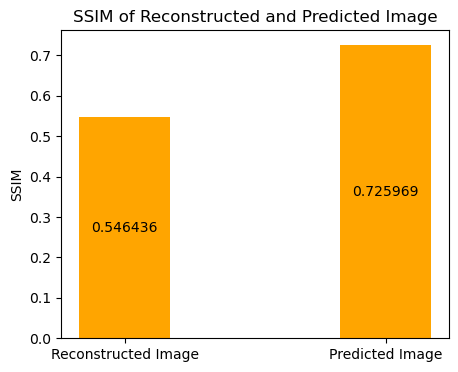

In [58]:
params = {
    'figure.figsize': '5, 4'
}
plt.rcParams.update(params)

xlabels = ['Reconstructed Image', 'Predicted Image']
ssim = []
ssim.append(rec_ssim)
ssim.append(pred_ssim)
width = 0.35

p1 = plt.bar(xlabels, ssim, width, color=['orange', 'orange'])
plt.bar_label(p1, label_type='center')
plt.ylabel("SSIM")
plt.title('SSIM of Reconstructed and Predicted Image')
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/ssim111.png")
plt.show()

3.画折线图比较

In [6]:
# 生成坐标轴
img_num = len(pred_ssim_list)
x_label = []
for i in range(img_num):
    x_label.append(i+1)
print(x_label)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

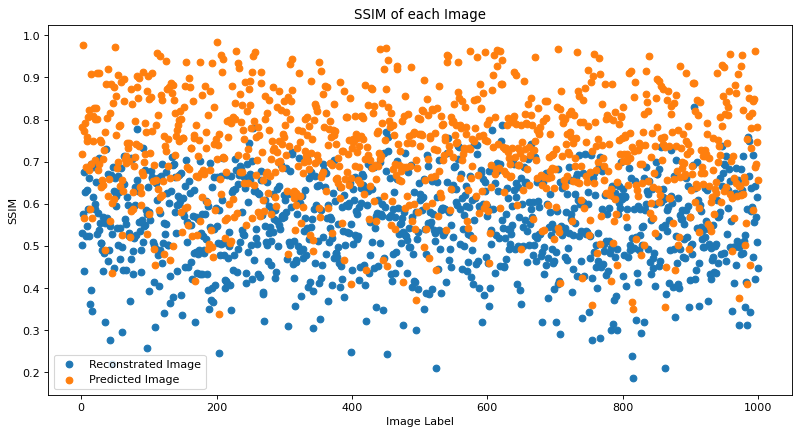

In [36]:
# 画图
figure=plt.figure(figsize=(12,6),dpi=80)

rec_ssim_points = plt.scatter(x_label, rec_ssim_list, label = 'Reconstrated Image')
pred_ssim_points = plt.scatter(x_label, pred_ssim_list, label = 'Predicted Image')

plt.xlabel("Image Label")
plt.ylabel("SSIM")

plt.legend(loc = 'best')
plt.title('SSIM of each Image')
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/ssim_of_each_image.png")
plt.show()

# MSE

In [43]:
rec_dir = os.listdir(rec_path)
rec_mse_sum = 0
img_num = len(rec_dir)
print(img_num)
rec_mse_list = []
for file in rec_dir:
    rec_img = np.array(Image.open(os.path.join(rec_path,file)))
    pre_img = np.array(Image.open(os.path.join(pre_path,file)))
    img_mse = mean_squared_error(rec_img, pre_img)
    rec_mse_sum = rec_mse_sum + img_mse
    rec_mse_list.append(img_mse)
print(rec_mse_sum/img_num)
print(len(rec_mse_list))
rec_mse = rec_mse_sum/img_num

1000
274.26252212711245
1000


In [44]:
rec_dir = os.listdir(rec_path)
pred_mse_sum = 0
img_num = len(rec_dir)
print(img_num)
pred_mse_list = []
for file in rec_dir:
    pred_img = np.array(np.load(pred_path + '/'+ file + '.npy'))
    pre_img = np.array(Image.open(os.path.join(pre_path,file)))
    pred_img = pred_img.astype(np.uint8)
    # pre_img = pre_img.astype(np.float32) / 255
#     print(pred_img.dtype)
#     print(pre_img.dtype)
    img_mse = mean_squared_error(pred_img, pre_img)
    pred_mse_sum = pred_mse_sum + img_mse
    pred_mse_list.append(img_mse)
print(pred_mse_sum/img_num)
print(len(pred_mse_list))
pred_mse = pred_mse_sum/img_num

1000
126.67650800183338
1000


2.画柱状图比较

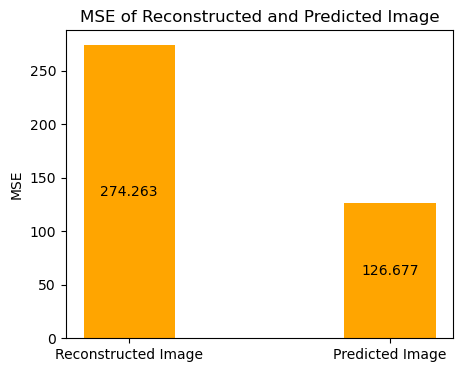

In [45]:
params = {
    'figure.figsize': '5, 4'
}
plt.rcParams.update(params)

xlabels = ['Reconstructed Image', 'Predicted Image']
mse = []
mse.append(rec_mse)
mse.append(pred_mse)
width = 0.35

p1 = plt.bar(xlabels, mse, width, color=['orange', 'orange'])
plt.bar_label(p1, label_type='center')
plt.ylabel("MSE")
plt.title('MSE of Reconstructed and Predicted Image')
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/mse111.png")
plt.show()

3.画折线图比较

In [46]:
# 生成坐标轴
img_num = len(pred_mse_list)
x_label = []
for i in range(img_num):
    x_label.append(i+1)
print(x_label)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

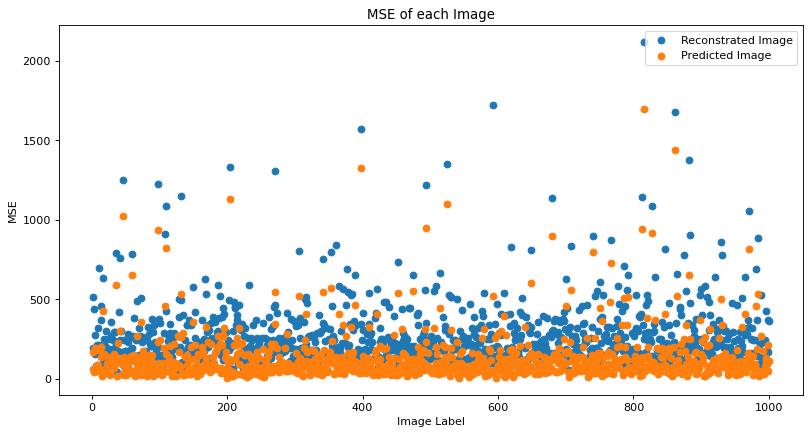

In [47]:
# 画图
figure=plt.figure(figsize=(12,6),dpi=80)

rec_mse_points = plt.scatter(x_label, rec_mse_list, label = 'Reconstrated Image')
pred_mse_points = plt.scatter(x_label, pred_mse_list, label = 'Predicted Image')

plt.xlabel("Image Label")
plt.ylabel("MSE")

plt.legend(loc = 'best')
plt.title('MSE of each Image')
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/mse_of_each_image.png")
plt.show()

# PSNR

In [50]:
rec_dir = os.listdir(rec_path)
rec_psnr_sum = 0
img_num = len(rec_dir)
print(img_num)
rec_psnr_list = []
for file in rec_dir:
    rec_img = np.array(Image.open(os.path.join(rec_path,file)))
    pre_img = np.array(Image.open(os.path.join(pre_path,file)))
    img_psnr = psnr(rec_img, pre_img)
    rec_psnr_sum = rec_psnr_sum + img_psnr
    rec_psnr_list.append(img_psnr)
print(rec_psnr_sum/img_num)
print(len(rec_psnr_list))
rec_psnr = rec_psnr_sum/img_num

1000
24.619067288456012
1000


In [51]:
rec_dir = os.listdir(rec_path)
pred_psnr_sum = 0
img_num = len(rec_dir)
print(img_num)
pred_psnr_list = []
for file in rec_dir:
    pred_img = np.array(np.load(pred_path + '/'+ file + '.npy'))
    pre_img = np.array(Image.open(os.path.join(pre_path,file)))
    pred_img = pred_img.astype(np.uint8)
    # pre_img = pre_img.astype(np.float32) / 255
#     print(pred_img.dtype)
#     print(pre_img.dtype)
    img_psnr = psnr(pred_img, pre_img)
    pred_psnr_sum = pred_psnr_sum + img_psnr
    pred_psnr_list.append(img_psnr)
print(pred_psnr_sum/img_num)
print(len(pred_psnr_list))
pred_psnr = pred_psnr_sum/img_num

1000
28.764842342920346
1000


2.画柱状图比较

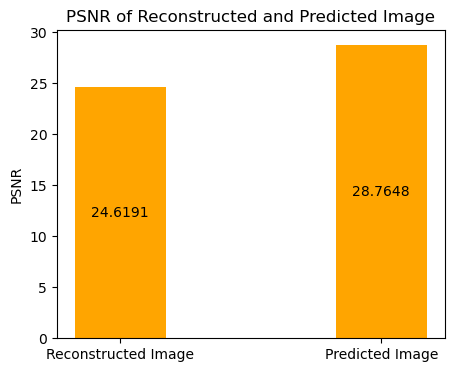

In [52]:
params = {
    'figure.figsize': '5, 4'
}
plt.rcParams.update(params)
xlabels = ['Reconstructed Image', 'Predicted Image']

psnr = []
psnr.append(rec_psnr)
psnr.append(pred_psnr)
width = 0.35

p1 = plt.bar(xlabels, psnr, width, color=['orange', 'orange'])
plt.bar_label(p1, label_type='center')
plt.ylabel("PSNR")
plt.title('PSNR of Reconstructed and Predicted Image')
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/psnr111.png")
plt.show()

3.画折线图比较

In [54]:
# 生成坐标轴
img_num = len(pred_psnr_list)
x_label = []
for i in range(img_num):
    x_label.append(i+1)
print(x_label)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

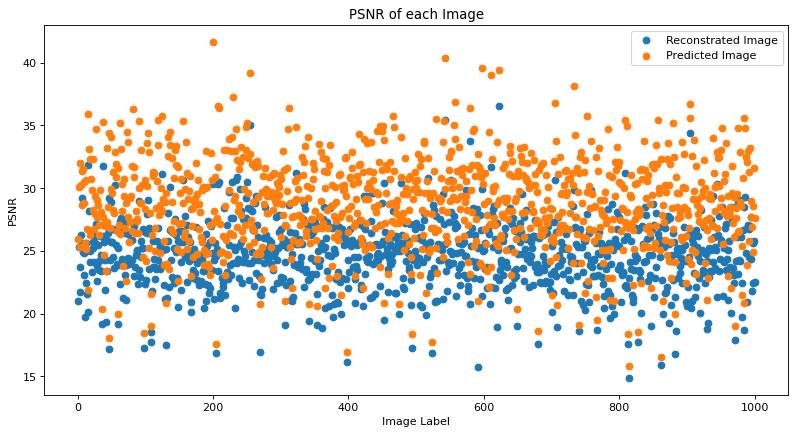

In [55]:
# 画图
figure=plt.figure(figsize=(12,6),dpi=80)

rec_psnr_points = plt.scatter(x_label, rec_psnr_list, label = 'Reconstrated Image')
pred_psnr_points = plt.scatter(x_label, pred_psnr_list, label = 'Predicted Image')

plt.xlabel("Image Label")
plt.ylabel("PSNR")

plt.legend(loc = 'best')
plt.title('PSNR of each Image')
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/psnr_of_each_image.png")
plt.show()

画模型效果图

In [2]:
img_pre = 'D:/Document/DataSet/hzh_200_epoch_training_result/val_images_y/ISIC_0029436.jpg'
img_rec = 'D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x/ISIC_0029436.jpg'
img_pred = 'D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x_predict/ISIC_0029436.jpg'


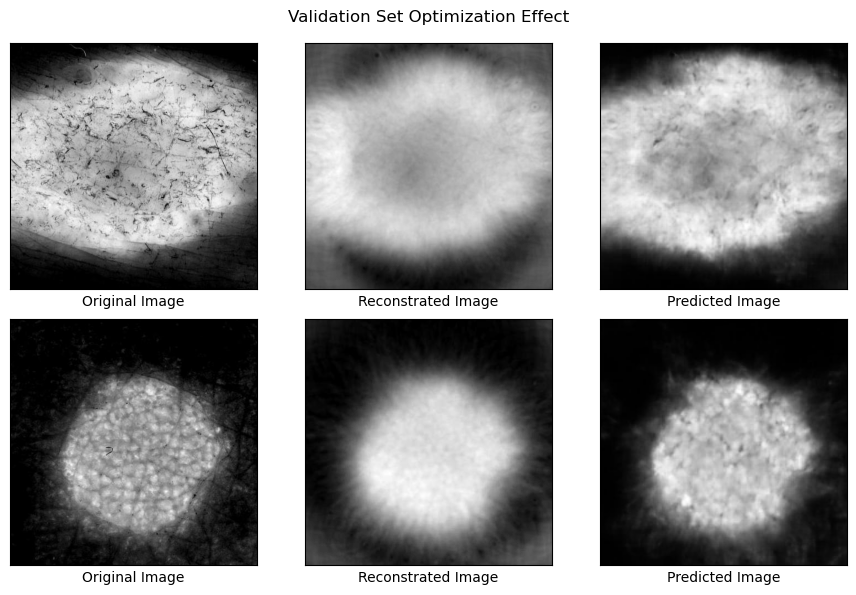

In [4]:
# 画图
# figure=plt.figure(figsize=(11,5),dpi=80)
fig = plt.figure(figsize=(9,6))
# 子图1
img_pre = Image.open(r"D:/Document/DataSet/hzh_200_epoch_training_result/val_images_y/ISIC_0029436.jpg")
ax1 = fig.add_subplot(231)
ax1.imshow(img_pre,cmap='gray')
plt.xlabel("Original Image")
plt.xticks([]) # 去掉x轴 
plt.yticks([]) # 去掉y轴
 
# 子图2
img_rec = Image.open(r"D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x/ISIC_0029436.jpg")
ax1 = fig.add_subplot(232)
ax1.imshow(img_rec,cmap='gray')
plt.xlabel("Reconstrated Image")
plt.xticks([]) # 去掉x轴 
plt.yticks([]) # 去掉y轴

# 子图3
img_pred = Image.open(r"D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x_predict/ISIC_0029436.jpg")
ax1 = fig.add_subplot(233)
ax1.imshow(img_pred,cmap='gray')
plt.xlabel("Predicted Image")
plt.xticks([]) # 去掉x轴 
plt.yticks([]) # 去掉y轴

# 子图4
img_pre = Image.open(r"D:/Document/DataSet/hzh_200_epoch_training_result/val_images_y/ISIC_0030043.jpg")
ax1 = fig.add_subplot(234)
ax1.imshow(img_pre,cmap='gray')
plt.xlabel("Original Image")
plt.xticks([]) # 去掉x轴 
plt.yticks([]) # 去掉y轴
 
# 子图5
img_rec = Image.open(r"D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x/ISIC_0030043.jpg")
ax1 = fig.add_subplot(235)
ax1.imshow(img_rec,cmap='gray')
plt.xlabel("Reconstrated Image")
plt.xticks([]) # 去掉x轴 
plt.yticks([]) # 去掉y轴

# 子图6
img_pred = Image.open(r"D:/Document/DataSet/hzh_200_epoch_training_result/val_images_x_predict/ISIC_0030043.jpg")
ax1 = fig.add_subplot(236)
ax1.imshow(img_pred,cmap='gray')
plt.xlabel("Predicted Image")
plt.xticks([]) # 去掉x轴 
plt.yticks([]) # 去掉y轴
    
fig.suptitle('Validation Set Optimization Effect')
    
plt.tight_layout()
plt.savefig("D:/Document/NutCloud/中山大学文件/2023年寒假/毕业论文/论文图片/hhhhhhh.png")
plt.show()